## Table Of Contents:
    

- [Data Set](#ds)
- [Questions](#qs) 
- [Data Analysis Process](#da) 
    * [Gathering data](#gd) 
    * [Exploring Data](#ed) 
    * [Cleaning Data](#cd) 
- [Saving the data](#sd) 
- [Visualizations and answering questions](#vs)

### 1- Data Set: <a class="anchor" id="ds"></a>

    - Medical Appointment No Shows.
### 2- Questions that we need to answers: <a class="anchor" id="qs"></a>
    - What are the most encouraing hospitals that encourage patients to show up in their appointmants?
    - What is the  most life stage in which the people are showing up in their appointments?
    - what is the most favourite day and time to scheldule a appointment?
    - what are the most gender that care more about shwoing up in their appointments?
    - Does sending SMS messages to patients affect their interest in visiting hospitals?

### 3- Data Analysis process: <a class="anchor" id="da"></a>
####    a. Gathering data: <a class="anchor" id="gd"></a>
        this step done by loading the csv data into DataFrame using Pandas data frame library: 
    

In [1]:
# Imorting important libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
#reading a csv file and loading it into data frame:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

####    b. Exploring data both visually and programatically and identifyig quality and tidiness issues: <a class="anchor" id="ed"></a>

In [2]:
# Exploring data visually:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Note: niether quallty or tidinees were found.

In [4]:
#Programatially Ecploration:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#####    - Quality issue 1:
    There are a lot of problems in kind of columns data types
there are no null values

In [5]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [6]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [7]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#####    - Qaulity issue 2:
    since the valuse have to be a True or false, this column have to have only 0 or 1 values, but is has a vlues other than that.

In [8]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

#####    - Quaity issue 3:
    there are not reasonable value for the age, the age annot be negative.

In [9]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [10]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [11]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [12]:
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

#### C. Cleaning Data from these issues: <a class="anchor" id="cd"></a>
    - Incorrect columns data types.
    - Incorrect value in Age column.
    - incorrect values in Handcap column.

In [13]:
## Coping dataFrame:

df_new= df.copy()
### PatienID and AppointmentID To string data type because we won't do any maths on them:
df_new["PatientId"] = df_new["PatientId"].astype('int64')
df_new["PatientId"] = df_new["PatientId"].astype('str')

df_new["AppointmentID"] = df_new["AppointmentID"].astype('int64')
df_new["AppointmentID"] = df_new["AppointmentID"].astype('str')
### Test:
print(df_new["PatientId"].dtype, df_new["AppointmentID"].dtype)

object object


In [14]:
### ScheduledDay and AppointmentDay to datetime data type:

df_new["ScheduledDay"] = pd.to_datetime(df_new["ScheduledDay"], utc= True)
df_new["AppointmentDay"] = pd.to_datetime(df_new["AppointmentDay"], utc= True)

### Test: 

print(df_new["ScheduledDay"].dtype)
print(df_new["AppointmentDay"].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]


In [15]:
### Scholarship to boolean type:

df_new["Scholarship"] = df_new["Scholarship"].astype("bool")

### Test: 
print(df_new["Scholarship"].dtype)
df_new["Scholarship"].value_counts()

bool


False    99666
True     10861
Name: Scholarship, dtype: int64

In [16]:
### Hypertension to boolean type:

df_new["Hipertension"] = df_new["Hipertension"].astype("bool")

### Test: 
print(df_new["Hipertension"].dtype)
df_new["Hipertension"].value_counts()

bool


False    88726
True     21801
Name: Hipertension, dtype: int64

In [17]:
### Diabetes to boolean type:
df_new.Diabetes = df_new.Diabetes.astype('bool')
### Test: 
print(df_new.Diabetes.dtype)
df_new.Diabetes.value_counts()

bool


False    102584
True       7943
Name: Diabetes, dtype: int64

In [18]:
### Alcoholism to Boolean:

df_new.Alcoholism = df_new.Alcoholism.astype('bool')

### Test: 

print(df_new.Alcoholism.dtype)
df_new.Alcoholism.value_counts()

bool


False    107167
True       3360
Name: Alcoholism, dtype: int64

In [19]:
### SMS to Boolean
df_new.SMS_received = df_new.SMS_received.astype('bool')

### Test: 
print(df_new.SMS_received.dtype)
df_new.SMS_received.value_counts()

bool


False    75045
True     35482
Name: SMS_received, dtype: int64

In [20]:
### HandCap Imcorrect values:


#### First we will try to invesrigate this piece of data:
df_new[df_new["Handcap"] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,72825819926211,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,False,True,True,False,2,True,No
1665,12429193284112,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,False,True,False,True,2,True,No
1666,12429193284112,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,False,True,False,True,2,False,No
2071,12429193284112,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,False,True,False,True,2,False,No
2091,14918292313383,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,False,False,False,False,2,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,238721151823643,5756931,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,False,True,True,False,2,True,No
109484,358949459162675,5752442,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,False,True,True,False,2,False,No
109733,566297621534644,5772744,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,False,False,False,False,2,True,No
109975,45221851115953,5766970,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,True,False,False,False,2,True,No


    - Here we will assume that numbers more that 1 means that the person has more one disabilities, so we will consider it as true

In [21]:
### converting it into boolean:
df_new["Handcap"] = df_new["Handcap"].astype("bool")

### test:
print(df_new["Handcap"].dtype)
df_new["Handcap"].value_counts()

bool


False    108286
True       2241
Name: Handcap, dtype: int64

In [22]:
### Age Incorrect Values:
### Exploring it:
df_new[df_new["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,False,False,False,False,False,False,No


    -We will consider it as 0 in - a child in his first year - .

In [23]:
df_new.loc[df["Age"] < 0,"Age"] = 0

In [24]:
### Test:
df_new[df_new["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hipertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handcap         110527 non-null  bool               
 12  SMS_received    110527 non-null  bool               
 13  No-show       

### 4- Saving from the edited data copy to a new CSV file: <a class="anchor" id="sd"></a>

In [26]:

df_new.to_csv("medical_new.csv", index=False)

In [27]:
df_1 = pd.read_csv("medical_new.csv", low_memory=False)

df_1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


### 5- Visulaization and Answering Our Questions: <a class="anchor" id="vs"></a>

- What are the most encouraing hospitals that encourage patients to show up in their appointmants?
- What is the  most life stage in which the people are showing up in their appointments?
- what is the most favourite day and time to scheldule a appointment?
- what are the most gender that care more about shwoing up in their appointments?
- Does sending SMS messages to patients affect their interest in visiting hospitals?

In [28]:
total_hosp_counts = pd.Series(df_new.Neighbourhood.value_counts(), name= "Total_counts")

yes_count = pd.Series(df_new[df_new["No-show"] == "Yes"].Neighbourhood.value_counts(), name="Yes_counts")

master = pd.concat([total_hosp_counts, yes_count],join="inner", axis=1)

print(master)
# (df_1[df_1["No-show"] == "Yes"].Neighbourhood.value_counts() / df_1.Neighbourhood.value_counts())*100

                             Total_counts  Yes_counts
JARDIM CAMBURI                       7717        1465
MARIA ORTIZ                          5805        1219
RESISTÊNCIA                          4431         906
JARDIM DA PENHA                      3877         631
ITARARÉ                              3514         923
...                                   ...         ...
PONTAL DE CAMBURI                      69          12
ILHA DO BOI                            35           3
ILHA DO FRADE                          10           2
AEROPORTO                               8           1
ILHAS OCEÂNICAS DE TRINDADE             2           2

[80 rows x 2 columns]


In [29]:
yse_percentges = pd.Series(((yes_count / total_hosp_counts)).sort_values( ascending=False), name="Percentage")
master_1 = pd.concat([master, yse_percentges], join="inner", axis=1)
master_1 = master_1.sort_values("Percentage", ascending = False)
print(master_1)

                             Total_counts  Yes_counts  Percentage
ILHAS OCEÂNICAS DE TRINDADE             2           2    1.000000
SANTOS DUMONT                        1276         369    0.289185
SANTA CECÍLIA                         448         123    0.274554
SANTA CLARA                           506         134    0.264822
ITARARÉ                              3514         923    0.262664
...                                   ...         ...         ...
DE LOURDES                            305          47    0.154098
SOLON BORGES                          469          69    0.147122
MÁRIO CYPRESTE                        371          54    0.145553
AEROPORTO                               8           1    0.125000
ILHA DO BOI                            35           3    0.085714

[80 rows x 3 columns]


### - Insight 1:
    the most encouraging hospital for people to show up in their appointments is ILHAS OCEÂNICAS DE TRINDADE but it can be a wrog inight because it has jus two appointments, so if we considered it as an outlier, we consider SANTOS DUMONT hospital to be the best in this part.

In [30]:
%matplotlib inline

<AxesSubplot:xlabel='Gender', ylabel='count'>

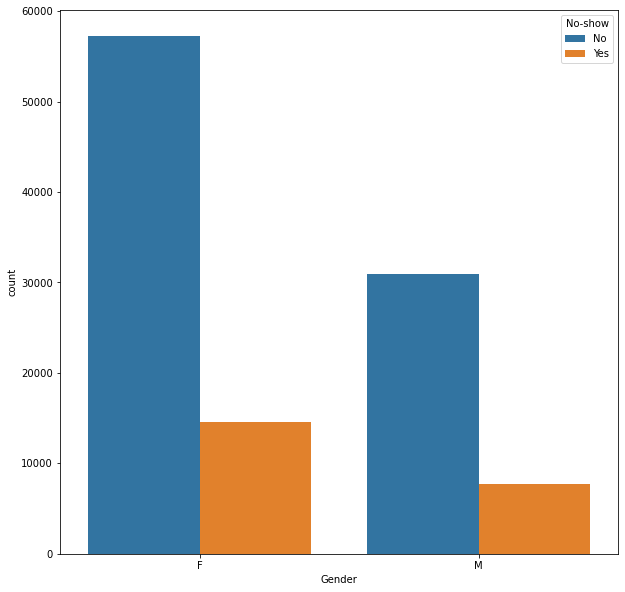

In [31]:
plt.figure(figsize = (10,10))
sns.countplot(data =df_new, x="Gender", hue="No-show") 

### Insight 2:
    - from the first sight we can say that females are more caring about their health by booking more appointments, but if we take into our consideration the percentage by which they showed up in their appointments, it's not so far from the males percentage.

In [32]:
df_new["life_stage"] = "None"
df_new.loc[df_new["Age"]>60,"life_stage"] = "Oldest"
df_new.loc[df_new["Age"]<=60,"life_stage"] = "Old"
df_new.loc[df_new["Age"]<=40,"life_stage"] = "Youth"
df_new.loc[df_new["Age"]<=18,"life_stage"] = "Child"

df_new["life_stage"].value_counts()

Youth     31817
Old       30081
Child     28867
Oldest    19762
Name: life_stage, dtype: int64

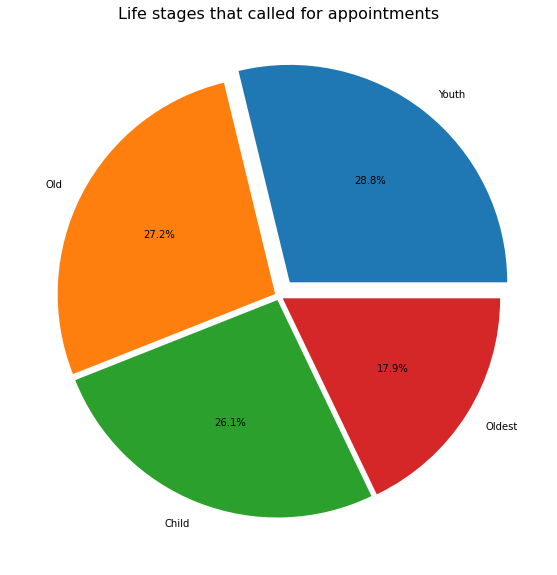

In [33]:
plt.figure(figsize = (10,10))
plt.title("Life stages that called for appointments", fontsize = 16)
plt.pie(x= df_new["life_stage"].value_counts(), labels= df_new["life_stage"].value_counts().index,
       explode=[0.08, 0.02, 0.02, 0.02],autopct="%.1f%%");

### - Insight 3:
    - That shos that the most life stage is the Youth but with a slight difference between this stage and Children or the Old people.

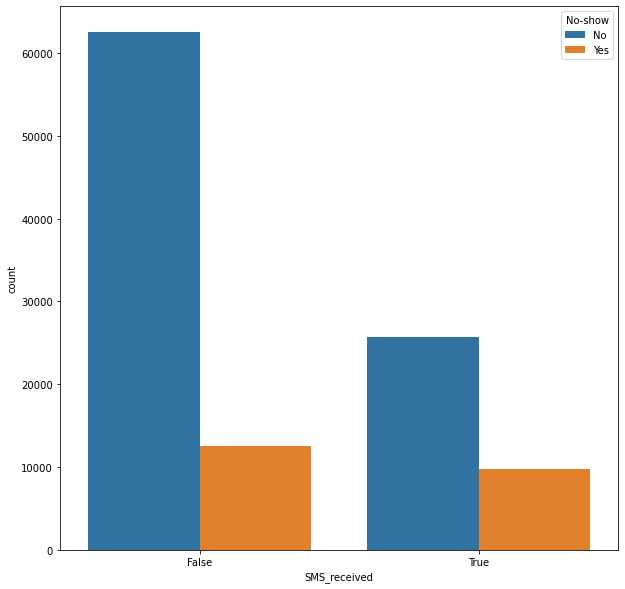

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(data =df_new, x="SMS_received", hue="No-show");

### - Insight 4:
    - By Comparison between the two parts we foound that Sending an SMS messages in very importatnt in order to make the patients show up in their appointments.

In [35]:
df_new['AppointmentDay'].dtype
df_new["Day_Name"] = df_new['AppointmentDay'].dt.day_name()

In [36]:
df_new["Day_Name"].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Day_Name, dtype: int64

<AxesSubplot:xlabel='Day_Name', ylabel='Count'>

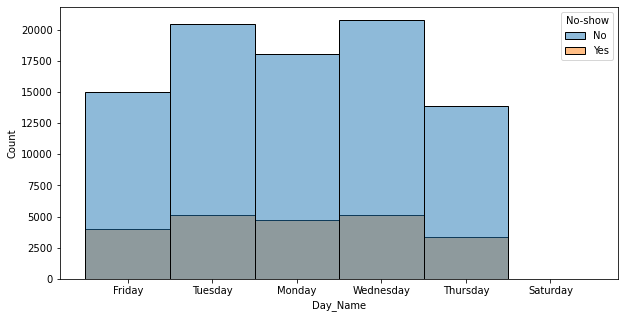

In [37]:
plt.figure(figsize = (10,5))
sns.histplot(data= df_new, x= df_new["Day_Name"], hue="No-show")

### - Insight 5:
    - As we can see from this histogram, Wednesday and Tuesday are the most likely to have an appointments for patients